In [18]:
import json
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import subprocess


In [19]:
def visualize_answers(ground_truth_file, predicted_answers_file,question_file,image_file):
    with open(ground_truth_file, 'r') as f:
        ground_truth_data = json.load(f)

    with open(predicted_answers_file, 'r') as f:
        predicted_answers_data = json.load(f)

    with open(question_file, 'r') as f:
        question_data = json.load(f)

        

    with open(image_file, 'r') as f:
        image_data = json.load(f)

    ground_truth_dict = {entry['question_id']: entry['multiple_choice_answer'] for entry in ground_truth_data['annotations']}
    predicted_dict = {entry['question_id']: entry['answer'] for entry in predicted_answers_data}
    question_dict = {entry['question_id']: entry['question'] for entry in question_data['questions']}
    image_dict={entry['id']: entry['file_name'] for entry in image_data['images']}
    

    count=0

    for question_id, predicted_answer in predicted_dict.items():
        if question_id in ground_truth_dict:
            ground_truth_entry = ground_truth_dict[question_id]
            print(question_id)
            question=question_dict.get(question_id)
            for item in question_data['questions']:
                if item["question_id"] == question_id:
                    image_id = item["image_id"]
            image_name=image_dict.get(image_id)
            image_path = f"/work/lect0099/coco2014val/validation/data/{image_name}"
            subprocess.run(["code", image_path])
            #image = Image.open(image_path)
            #image.show()
            #question = next((q for q, qid in question_dict.items() if qid == question_id),None)
            ground_truth_answer = ground_truth_entry

            print(f"Question: {question}")
            print(f"Ground Truth Answer: {ground_truth_answer}")
            print(f"Predicted Answer: {predicted_answer}")
            print("-----------------------")


            count += 1
            if count == 10:
                break  # Stop after the first 10 entries

In [20]:
ground_truth_file = '/hpcwork/lect0099/data/Answers/v2_mscoco_val2014_annotations.json'
predicted_answers_file = '/hpcwork/lect0099/saved_models/gl671475/bs-lr/ban_1_spatial_vqa_200_bs_64_lr_0.01_ep_20/eval/vqa_val.json'
question_file='/hpcwork/lect0099/data/Questions/v2_OpenEnded_mscoco_val2014_questions.json'
image_file='/work/lect0099/coco2014val/validation/labels.json'
visualize_answers(ground_truth_file, predicted_answers_file,question_file,image_file)

42000
Question: What color are the gym shoes?
Ground Truth Answer: white
Predicted Answer: red
-----------------------
42001
Question: Is there a red sandal here?
Ground Truth Answer: yes
Predicted Answer: yes
-----------------------
42002
Question: What color is the flip flop?
Ground Truth Answer: red
Predicted Answer: red
-----------------------
73000
Question: What is the license number?
Ground Truth Answer: sv-6260
Predicted Answer: unknown
-----------------------
73001
Question: Is this a motorcycle or bike?
Ground Truth Answer: motorcycle
Predicted Answer: motorcycle
-----------------------
73002
Question: What color is the bike?
Ground Truth Answer: black
Predicted Answer: black
-----------------------
73003
Question: What letter and 3 numbers are on the tag?
Ground Truth Answer: sv-6260
Predicted Answer: b
-----------------------
74000
Question: Does this dog have a collar?
Ground Truth Answer: no
Predicted Answer: no
-----------------------
74001
Question: Where is the dog lay

In [3]:
import json

# Load the first JSON file
with open('/hpcwork/lect0099/data/Questions/v2_OpenEnded_mscoco_val2014_questions.json') as f1:
    first_data = json.load(f1)

# Load the second JSON file
with open('/hpcwork/lect0099/saved_models/gl671475/bs-lr/ban_1_spatial_vqa_200_bs_64_lr_0.01_ep_20/eval/vqa_val.json') as f2:
    second_data = json.load(f2)

# Create a dictionary to map question IDs to image IDs
id_mapping = {item['question_id']: item['image_id'] for item in first_data['questions']}

# Add image IDs to the second JSON data
for item in second_data:
    question_id = item['question_id']
    if question_id in id_mapping:
        item['image_id'] = id_mapping[question_id]

# Save the updated second JSON data
with open('/hpcwork/lect0099/saved_models/gl671475/bs-lr/ban_1_spatial_vqa_200_bs_64_lr_0.01_ep_20/eval/vqa_val_up.json', 'w') as f:
    json.dump(second_data, f)


In [2]:
import json

# Load the first JSON file
with open('/hpcwork/lect0099/data/Questions/v2_OpenEnded_mscoco_val2014_questions.json') as f1:
    first_data = json.load(f1)

# Load the second JSON file
with open('/hpcwork/lect0099/saved_models/gl671475/bs-lr/ban_1_spatial_vqa_200_bs_64_lr_0.01_ep_20/eval/vqa_val.json') as f2:
    second_data = json.load(f2)

# Create a dictionary to map question IDs to image IDs
id_mapping = {item['question_id']: item['image_id'] for item in first_data['questions']}

# Add image IDs to the second JSON data
for item in second_data:
    question_id = item['question_id']
    if question_id in id_mapping:
        item['image_id'] = id_mapping[question_id]

# Transform the second JSON data into the desired format
updated_second_data = {"annotations": second_data}

# Save the updated second JSON data
with open('/hpcwork/lect0099/saved_models/gl671475/bs-lr/ban_1_spatial_vqa_200_bs_64_lr_0.01_ep_20/eval/vqa_val_up.json', 'w') as f:
    json.dump(updated_second_data, f)


loading VQA annotations and questions into memory...
0:00:03.964386
creating index...
index created!
Loading and preparing results...     
creating index...
index created!
computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy


Overall Accuracy is: 60.15

Per Question Type Accuracy is the following:
none of the above : 54.15
what are the : 45.07
what is : 36.95
what : 42.23
is this a : 76.47
is this : 75.57
what is the man : 61.27
how many : 50.55
what does the : 23.29
why : 17.11
is it : 87.52
why is the : 20.54
what color is the : 75.66
is there a : 77.67
is the : 73.63
is that a : 70.74
are these : 75.01
are the : 73.58
what is the : 44.14
which : 44.19
could : 79.87
are there : 79.81
what kind of : 52.45
has : 71.91
what color are the : 74.29
are there any : 84.45
is this person : 75.42
does the : 74.53
where is the : 31.94
how many people are : 53.02
can you : 71.62
what type of : 51.45
what is the color of the : 78.93
what is on the : 38.99
does t

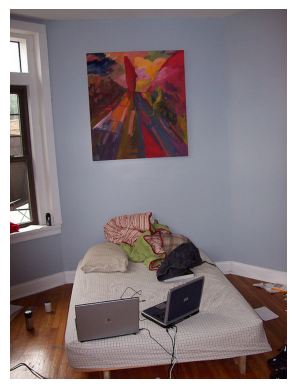

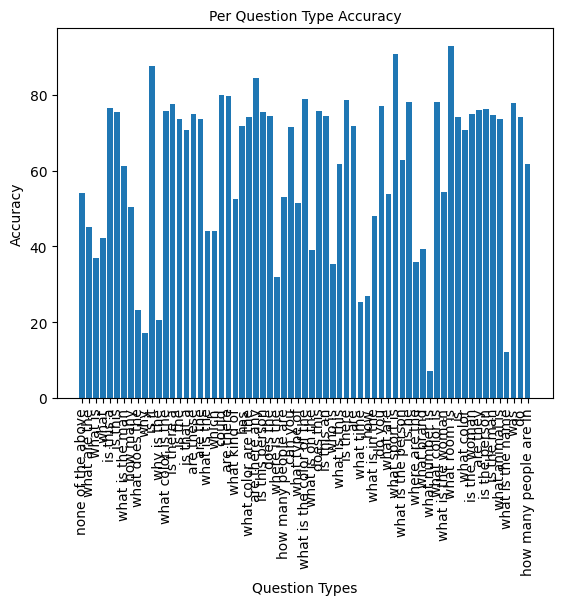

In [ ]:
# coding: utf-8

import sys

from vqa import VQA
from vqaeval import VQAEval
import matplotlib.pyplot as plt
import skimage.io as io
import json
import random
import os

# set up file names and paths
#versionType ='v2_' # this should be '' when using VQA v2.0 dataset
#taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
#dataType    ='mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0. 
dataSubType ='val2014'
annFile     ='/hpcwork/lect0099/data/Answers/v2_mscoco_val2014_annotations.json'
quesFile    ='/hpcwork/lect0099/data/Questions/v2_OpenEnded_mscoco_val2014_questions.json'
imgDir      ='/work/lect0099/coco2014val/validation/data'
resultType  ='fake'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType'] 
resFile='/hpcwork/lect0099/saved_models/gl671475/bs-lr/ban_1_spatial_vqa_200_bs_64_lr_0.01_ep_20/eval/vqa_val_up.json'

# An example result json file has been provided in './Results' folder.  

#[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = ['%s/Results/%s%s_%s_%s_%s_%s.json'%(dataDir, versionType, taskType, dataType, dataSubType, \resultType, fileType) for fileType in fileTypes]  

# create vqa object and vqaRes object
vqa = VQA(annFile, quesFile)
vqaRes = vqa.loadRes(resFile, quesFile)

# create vqaEval object by taking vqa and vqaRes
vqaEval = VQAEval(vqa, vqaRes, n=2)   #n is precision of accuracy (number of places after decimal), default is 2

# evaluate results
"""
If you have a list of question ids on which you would like to evaluate your results, pass it as a list to below function
By default it uses all the question ids in annotation file
"""
vqaEval.evaluate() 

# print accuracies
print("\n")
print ("Overall Accuracy is: %.02f\n" %(vqaEval.accuracy['overall']))
print ("Per Question Type Accuracy is the following:")
for quesType in vqaEval.accuracy['perQuestionType']:
	print ("%s : %.02f" %(quesType, vqaEval.accuracy['perQuestionType'][quesType]))
print("\n")
print ("Per Answer Type Accuracy is the following:")
for ansType in vqaEval.accuracy['perAnswerType']:
	print ("%s : %.02f" %(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print("\n")
# demo how to use evalQA to retrieve low score result
evals = [quesId for quesId in vqaEval.evalQA if vqaEval.evalQA[quesId]>75]
   #35 is per question percentage accuracy
if len(evals) > 0:
	print ('ground truth answers')
	randomEval = random.choice(evals)
	randomAnn = vqa.loadQA(randomEval)
	vqa.showQA(randomAnn)

	print("\n")
	print ('generated answer (accuracy %.02f)'%(vqaEval.evalQA[randomEval]))
	ann = vqaRes.loadQA(randomEval)[0]
	print ("Answer:   %s\n" %(ann['answer']))

	imgId = randomAnn[0]['image_id']
	imgFilename = '/COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
	if os.path.isfile(imgDir + imgFilename):
		I = io.imread(imgDir + imgFilename)
		plt.imshow(I)
		plt.axis('off')
		plt.show()

# plot accuracy for various question types
plt.bar(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].values(), align='center')
plt.xticks(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].keys(), rotation=90,fontsize=10)
plt.title('Per Question Type Accuracy', fontsize=10)
plt.xlabel('Question Types', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

# save evaluation results to ./Results folder
#json.dump(vqaEval.accuracy,     open(accuracyFile,     'w'))
#json.dump(vqaEval.evalQA,       open(evalQAFile,       'w'))
#json.dump(vqaEval.evalQuesType, open(evalQuesTypeFile, 'w'))
#json.dump(vqaEval.evalAnsType,  open(evalAnsTypeFile,  'w'))
